# Install Transformers Library

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 9.4 MB/s 
     |████████████████████████████████| 6.6 MB 50.1 MB/s 
     |████████████████████████████████| 596 kB 64.8 MB/s 
     |████████████████████████████████| 86 kB 6.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

# Load Dataset

In [ ]:
df = pd.read_csv("/content/10trainset.csv")
# df = df.dropna()
df.head()

,use,text,label
0,TRAIN,library te aachi... ghore gia phn krchi,ham
1,TRAIN,"4.3.17 (Saturday) (Day order 1), 3 and 4 hour ...",ham
2,TRAIN,best of luck锟斤拷,ham
3,TRAIN,all the best..bhalo kore dis exm锟斤拷锟斤拷,ham
4,TRAIN,exm kobe ses hoe6e re tr???,ham


In [ ]:
df.shape

(419, 3)

In [ ]:
# check class distribution
df['label'].value_counts(normalize = True)

ham     0.921241
spam    0.078759
Name: label, dtype: float64

# Split train dataset into train, validation and test sets

In [ ]:
df['label'] = df['label'].replace(['ham','spam'],[0,1])
df['label']

0      0
1      0
2      0
3      0
4      0
      ..
414    0
415    0
416    0
417    0
418    0
Name: label, Length: 419, dtype: int64

In [ ]:
# df['label']

In [ ]:
# Validset
valid = pd.read_csv("/content/validset20%.csv")
valid = valid.dropna()
valid['label'].value_counts(normalize = True)
valid['label'] = valid['label'].replace(['ham','spam'],[0,1])
valid_text, valid_labels = valid['text'], valid['label']
valid.head()

,use,text,label
0,VALIDATION,Nice! Rs6.0 added. Your install was confirmed ...,1
1,VALIDATION,Woohoo!! You have successfully recharged for R...,1
2,VALIDATION,Congratulations on your 1st free recharge from...,1
3,VALIDATION,Plan your Summer Holiday to Thailand. Just Dia...,1
4,VALIDATION,Stay awesome @ OYO in Chennai! Our hotels star...,1


In [ ]:
# Testest 
test = pd.read_csv("/content/testset20%.csv")
test = test.dropna()
test['label'].value_counts(normalize = True)
test['label'] = test['label'].replace(['ham','spam'],[0,1])
train_text, train_labels = df['text'], df['label']
test_text, test_labels = test['text'], test['label']
test.head()
test.shape

(1148, 3)

In [ ]:
# train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'], 
#                                                                     random_state=2018, 
#                                                                     test_size=0.3, 
#                                                                     stratify=df['label'])

# # we will use temp_text and temp_labels to create validation and test set
# val_text, test_text, val_labels, test_labels = train_test_split(temp_text, 
#                                                                 temp_labels,
#                                                                 random_state=2018, 
#                                                                 test_size=0.5, 
#                                                                 stratify=temp_labels)

In [ ]:
# train_labels = train_labels.replace(['ham','spam'],[0,1])
# temp_labels = temp_labels.replace(['ham','spam'],[0,1])
# val_labels = val_labels.replace(['ham','spam'],[0,1])
# test_labels = test_labels.replace(['ham','spam'],[0,1])

# Import BERT Model and BERT Tokenizer

In [ ]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
# sample data
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True, return_token_type_ids=False)

In [ ]:
# output
print(sent_id)

{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


# Tokenization

In [ ]:
print(train_text)

0                library te aachi... ghore gia phn krchi
1      4.3.17 (Saturday) (Day order 1), 3 and 4 hour ...
2                                        best of luck锟斤拷
3                 all the best..bhalo kore dis exm锟斤拷锟斤拷
4                            exm kobe ses hoe6e re tr???
                             ...                        
414    I cant wait to see you! How were the photos we...
415    Hey i booked the kb on sat already... what oth...
416                             Chk in ur belovd ms dict
417               Is that what time you want me to come?
418           Awesome, lemme know whenever you're around
Name: text, Length: 419, dtype: object


In [ ]:
print(train_text.shape)

(419,)


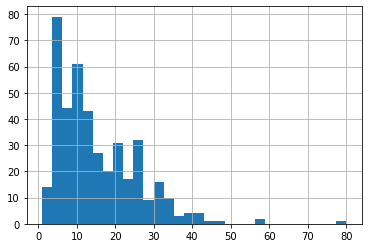

In [ ]:
# get length of all the messages in the train set
seq_len = [len(str(i).split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 25

In [ ]:
train_text = train_text.tolist()

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text,
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    valid_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


# Convert Integer Sequences to Tensors

In [ ]:
train_labels = train_labels.tolist()
valid_labels = valid_labels.tolist()
test_labels = test_labels.tolist()

In [ ]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels)

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(valid_labels)

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels)

# Create DataLoaders

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

# Freeze BERT Parameters

In [ ]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

# Define Model Architecture

In [ ]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [ ]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


# Find Class Weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight(class_weight ='balanced', 
                                 classes = np.unique(train_labels),
                                 y = train_labels)
# class_wts = dict(zip(np.unique(train_labels), class_wts))

print(class_wts)


[0.54274611 6.34848485]


In [ ]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

# Fine-Tune BERT

In [ ]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      # elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

# Start Model Training

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10


TypeError: ignored

# Load Saved Model

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

# Get Predictions for Test Data

In [ ]:
# import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
# import tensorflow as tf
# has_gpu = tf.test.is_gpu_available(
#     cuda_only=False,
#     min_cuda_compute_capability=None)
# has_gpu

In [ ]:
#define a batch size
batch_size = 512

# wrap tensors
test_data = TensorDataset(test_seq, test_mask, test_y)

# sampler for sampling the data during training
test_sampler = SequentialSampler(test_data)

# dataLoader for train set
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

# empty list to save the model predictions
total_preds = []

test_label = []

for step,batch in enumerate(test_dataloader):
      
    batch = [t.to(device) for t in batch]

    sent_id, mask,labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

      labels = labels.detach().cpu().numpy()

      test_label.append(labels)
      # print(labels)


# reshape the predictions in form of (number of samples, no. of classes)
# preds  = np.concatenate(total_preds, axis=0)

In [ ]:
preds  = np.concatenate(total_preds, axis=0)
len(preds)

In [ ]:
test_label  = np.concatenate(test_label, axis=0)

In [ ]:
# preds = preds.detach().cpu().numpy()

In [ ]:
# # get predictions for test data
# with torch.no_grad():
#   preds = model(test_seq.to(device), test_mask.to(device))
#   preds = preds.detach().cpu().numpy()

In [ ]:
preds.size

In [ ]:
test_label.size

In [ ]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_label, preds))

In [ ]:
# confusion matrix
pd.crosstab(test_y, preds)